### Relevant links

https://www.kaggle.com/c/competitive-data-science-predict-future-sales

### Imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 
%load_ext autotime

In [203]:
from scripts.imports import *
import scripts.kaggle_data as kd
from scripts.utility import *

time: 1.14 ms


In [74]:
pd.options.display.max_rows = 4000
pd.set_option('display.max_columns', 999)
pd.options.mode.chained_assignment = None

time: 1.31 ms


### Getting data

In [ ]:
current_path = os.getcwd()
data_dir_path = os.path.join(current_path,"data")

if not os.path.exists(data_dir_path):
    os.mkdir(data_dir_path)

print(data_dir_path) #Never print

In [ ]:
kd.download_data('competitive-data-science-predict-future-sales',current_path)

In [4]:
#Listify files to download
all_data_files = os.listdir('data/') #Getting all files in data folder in a list
all_data_files = [x for x in all_data_files if x.endswith('.csv')] #Removing .ipynb files
all_data_files = [remove_from_right(x,4) for x in all_data_files] #Removing .csvs
all_data_files

['shops',
 'items',
 'submission_v1',
 'item_categories',
 'sales_train',
 'sample_submission',
 'test']

time: 5.84 ms


In [89]:
for i in all_data_files:
    print(i + "=" + f"kd.read_data('data/','csv','{i}')")
    print("")
    exec(i + "=" + f"kd.read_data('data/','csv','{i}')")
    exec(f"shape = {i}.shape")
    print(f"Shape of {i}: ", shape)
    exec(f"data_types = {i}.dtypes")
    print("")
    print(f"Data types in {i}: \n \n ", data_types)
    print("---------------------")

shops=kd.read_data('data/','csv','shops')

Shape of shops:  (60, 2)

Data types in shops: 
 
  shop_name    object
shop_id       int64
dtype: object
---------------------
items=kd.read_data('data/','csv','items')

Shape of items:  (22170, 3)

Data types in items: 
 
  item_name           object
item_id              int64
item_category_id     int64
dtype: object
---------------------
submission_v1=kd.read_data('data/','csv','submission_v1')

Shape of submission_v1:  (214200, 2)

Data types in submission_v1: 
 
  ID                  int64
item_cnt_month    float64
dtype: object
---------------------
item_categories=kd.read_data('data/','csv','item_categories')

Shape of item_categories:  (84, 2)

Data types in item_categories: 
 
  item_category_name    object
item_category_id       int64
dtype: object
---------------------
sales_train=kd.read_data('data/','csv','sales_train')

Shape of sales_train:  (2935849, 6)

Data types in sales_train: 
 
  date               object
date_block_num  

In [80]:
save_test = test

time: 1.02 ms


### Testing data

In [ ]:
sales_train >> head

In [20]:
#Unique data values
sales_train >> \
select(X.date,X.date_block_num) >> \
distinct(X.date,X.date_block_num) >> \
arrange(X.date_block_num, ascending = True) 

#Finding
#We have daily sales data as well

,date,date_block_num
0,02.01.2013,0
7554,01.01.2013,0
118,18.01.2013,0
98,17.01.2013,0
81,31.01.2013,0
65,14.01.2013,0
64,28.01.2013,0
62,22.01.2013,0
61,21.01.2013,0
49,20.01.2013,0


time: 456 ms


In [6]:
#Check for missing value in train data
for k in sales_train.columns:
    display_all(sales_train >> summarise_each([null_percent],k))

,date_wrapper
0,0.0


,date_block_num_wrapper
0,0.0


,shop_id_wrapper
0,0.0


,item_id_wrapper
0,0.0


,item_price_wrapper
0,0.0


,item_cnt_day_wrapper
0,0.0


time: 580 ms


### Feature engineering

#### See headers of all data

In [20]:
sales_train >> head

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


time: 40 ms


In [9]:
shops >> head

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


time: 6.03 ms


In [10]:
items >> head

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


time: 8.56 ms


In [11]:
item_categories >> head

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


time: 6.97 ms


In [12]:
test >> head

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


time: 8.11 ms


#### Create features

 - Use tsfresh to construct time series features for item-shop, item and shop combination
 - Create train and valid datasets
 - Month specific features for the prediction month
 - Train period predicts for September
 - Valid period predicts for October
 - Retrain model on October for prediction on November

In [90]:
# Add dates to training data
sales_train = add_datepart(df = sales_train, custom_date_format = '%d.%m.%Y',field_name = 'date', drop = False)
#Assignment is done to avoid printing the dataframe

time: 4.3 s


In [91]:
raw_data = sales_train
raw_data = raw_data >> mutate(item_id = X.item_id.astype(str), shop_id = X.shop_id.astype(str))

time: 5.94 s


In [126]:
raw_data >> select(X.date_block_num,X.Month,X.Year) >> \
distinct(X.date_block_num,X.Month,X.Year) >> arrange(X.date_block_num)

#Will use date block num as a unique month idetifier from now on

,date_block_num,Month,Year
0,0,1,2013
115690,1,2,2013
224303,2,3,2013
345650,3,4,2013
439759,4,5,2013
531518,5,6,2013
631921,6,7,2013
732469,7,8,2013
837241,8,9,2013
933378,9,10,2013


time: 473 ms


In [123]:
#Parameters in this notebook
train_month = 32
valid_month = 33
test_month = 34

custom_parameters = {
 'sum_values': None,
 'absolute_sum_of_changes': None,
 'linear_trend': [{"attr": "slope"}],
 'skewness': None,
 'median': None,
 'mean': None}

time: 1.57 ms


In [124]:
train_raw_data = raw_data >> mask((X.date_block_num >= train_month -32) & (X.date_block_num <= train_month) ) >> \
mutate(date_flag = if_else(X.date_block_num == train_month,'y','x'))

valid_raw_data = raw_data >> mask((X.date_block_num >= valid_month -32) & (X.date_block_num <= valid_month) ) >> \
mutate(date_flag = if_else(X.date_block_num == valid_month,'y','x'))

test_raw_data = raw_data >> mask((X.date_block_num >= test_month -32) & (X.date_block_num <= test_month) ) >> \
mutate(date_flag = if_else(X.date_block_num == test_month,'y','x'))

time: 9.36 s


In [131]:
train = create_model_data(train_raw_data) 
valid = create_model_data(valid_raw_data) 

test = save_test >> mutate(item_id = X.item_id.astype(str), shop_id = X.shop_id.astype(str)) >> select(~X.ID) >> \
mutate(composite = X.item_id + X.shop_id)
print(test.shape)

(417004, 4)
(408799, 4)
(214200, 3)
time: 6.71 s


In [132]:
train = add_prediction_month_feature(train,train_raw_data,9)
valid = add_prediction_month_feature(valid,valid_raw_data,10)
test = add_prediction_month_feature(test,test_raw_data,11)

time: 13.8 s


In [134]:
item_train = create_sparse_data(train_raw_data,train,['item_id'])
item_valid = create_sparse_data(valid_raw_data,valid,['item_id'])
item_test = create_sparse_data(test_raw_data,test,['item_id'])

shop_train = create_sparse_data(train_raw_data,train,['shop_id'])
shop_valid = create_sparse_data(valid_raw_data,valid,['shop_id'])
shop_test = create_sparse_data(test_raw_data,test,['shop_id'])
    
is_train = create_sparse_data(train_raw_data,train,['item_id','shop_id'])
is_valid = create_sparse_data(valid_raw_data,valid,['item_id','shop_id'])
is_test = create_sparse_data(test_raw_data,test,['item_id','shop_id'])

item_train = ts_features(item_train,custom_parameters)
item_valid = ts_features(item_valid,custom_parameters)
item_test = ts_features(item_test,custom_parameters)

shop_train = ts_features(shop_train,custom_parameters)
shop_valid = ts_features(shop_valid,custom_parameters)
shop_test = ts_features(shop_test,custom_parameters)
    
is_train = ts_features(is_train,custom_parameters)
is_valid = ts_features(is_valid,custom_parameters)
is_test = ts_features(is_test,custom_parameters)
    
train = apply_ts_features(train,is_train,'composite')
valid = apply_ts_features(valid,is_valid,'composite')
test = apply_ts_features(test,is_test,'composite')
    
train = apply_ts_features(train,item_train,'item_id')
valid = apply_ts_features(valid,item_valid,'item_id')
test = apply_ts_features(test,item_test,'item_id')
    
train = apply_ts_features(train,shop_train,'shop_id')
valid = apply_ts_features(valid,shop_valid,'shop_id')
test = apply_ts_features(test,shop_test,'shop_id')

Feature Extraction: 100%|██████████| 80/80 [00:37<00:00,  2.64it/s]


time: 8min 46s


In [139]:
#Not actually needed, hence commented out
#Plot histograms or get min max to see -99999 isfar away from range present in data
#train.fillna(value=-99999,inplace = True) 
#valid.fillna(value=-99999,inplace = True)
#test.fillna(value=-99999,inplace = True)

time: 674 µs


In [137]:
#advanced_describe(train)

time: 680 µs


In [141]:
##data preparation
ind_columns = train.columns.to_list()

list_to_remove = ['shop_id','item_id','item_cnt_day']
ind_columns = remove_elements(ind_columns, list_to_remove )

dep_coloumns = ["item_cnt_day"]

cont_vars = train.head(5).select_dtypes(include= [np.number]).columns.to_list()
cont_vars = remove_elements(cont_vars, ['item_cnt_day'])

cat_vars = train.head(5).select_dtypes(include= [object]).columns.to_list()
list_to_remove = ['shop_id','item_id']

cat_vars = remove_elements(cat_vars, list_to_remove)

x_train = train[ind_columns]
y_train = train[dep_coloumns]

x_test = test[ind_columns]

x_valid = valid[ind_columns]
y_valid = valid[dep_coloumns]

print("Shape of training data: ", x_train.shape)
print("Shape of validation data: ", x_valid.shape)
print("Shape of test data: ", x_test.shape)

Shape of training data:  (417004, 21)
Shape of validation data:  (408799, 21)
Shape of test data:  (214200, 21)
time: 81.6 ms


### EDA

### Modelling

#### Baseline 
Predict the most recent sales data point

In [15]:
#Monthly sales
monthly_sales = dd_summarise(sales_train, ['shop_id','item_id','date_block_num'],'item_cnt_day', 'sum')

time: 2.13 s


In [22]:
#Max month block
filtered_sales_train = sales_train >> mask(X.date_block_num > 30)
max_month = dd_summarise(filtered_sales_train , ['shop_id','item_id'],'date_block_num', 'max')

time: 556 ms


In [25]:
#Get recent sales
predictions = monthly_sales >> inner_join(max_month, by =['shop_id','item_id','date_block_num'])

time: 485 ms


In [34]:
#Create the submission df
test_submission = test >> left_join(predictions, by = ['shop_id','item_id']) >> select(X.ID,X.item_cnt_day)
test_submission = test_submission >> rename(item_cnt_month = X.item_cnt_day) >> \
mutate(item_cnt_month = if_else(X.item_cnt_month.isnull(),0,X.item_cnt_month))

time: 197 ms


In [37]:
#Check the data type of submission file
test_submission.dtypes

ID                  int64
item_cnt_month    float64
dtype: object

time: 4.29 ms


#### RF
https://github.com/Archisman-Roy/DS_Explorations/blob/master/2018/reference/ML_TEMPLATE_HOUSE_PRICING_PROBLEM.ipynb

In [219]:
m = RandomForestRegressor(n_estimators=300, min_samples_leaf=10, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

time: 2min 37s


In [220]:
print_score(m,x_train,y_train,x_valid,y_valid)

[4.111228708111825, 3.8595859075414047, 0.3133574836654862, 0.10544386397795302, 0.17559980041840062]
time: 13 s


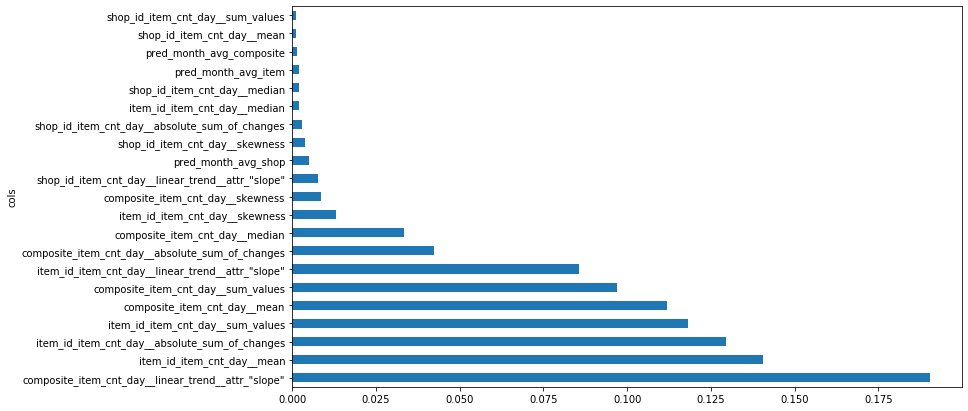

time: 711 ms


In [222]:
plot_fi(rf_feat_importance(m,x_train))

### Submission

In [39]:
#Heuristics based
test_submission.to_csv('data/submission_v1.csv', index=False)

time: 680 ms


In [223]:
#RF model
test_predictions = m.predict(x_test)
test_predictions.shape

(214200,)

time: 1.64 s


In [224]:
#Create the submission df
test_submission = save_test >> mutate(item_cnt_day = test_predictions)
test_submission = test_submission >> rename(item_cnt_month = X.item_cnt_day) >> drop(X.item_id,X.shop_id)

time: 22.2 ms


In [225]:
test_submission.shape

(214200, 2)

time: 2.11 ms


In [226]:
test_submission >> head

,ID,item_cnt_month
0,0,1.493382
1,1,3.361315
2,2,0.903704
3,3,0.424486
4,4,3.361315


time: 6.62 ms


In [227]:
test_submission.to_csv('data/submission_v1.csv', index=False)

time: 913 ms


### Unit tests